# [Free Probability Theory](https://en.wikipedia.org/wiki/Free_probability) Numerically

**References**:

1. A. Edelman & N. R. Rao, Random matrix theory, Acta Numerica, 233-297, 2005.
2. Rajesh Rao Nadakuditi, Applied Stochastic Eigen-Analysis(PhD Thesis MIT, 2007)
3. N. R. Rao & A. Edelman, The polynomial method for random matrices. Found. Comput. Math., 8(6), 649-702, 2008.
4. S. Olver & R. Rao N., [Numerical computation of convolutions in free probability theory](https://arxiv.org/pdf/1203.1958v1.pdf), 2012.
5. Roland Speicher, [Free probability theory and random matrices](https://link.springer.com/chapter/10.1007%2F3-540-44890-X_3), in pp 53-73 of Asymptotic Combinatorics with Applications to Mathematical Physics.
6. Roland Speicher, [Free probability theory and random matrices](http://web.mit.edu/sea06/agenda/talks/Speicher_survey.pdf)(**slides**)
7. D. Voiculescu, Addition of certain non-commuting random variables. J. Funct. Anal., 66, 323–346, 1986.
8. D. Voiculescu, Limit laws for random matrices and free products. Invent. math., 104, 201–220, 1991.

In [1]:
from numpy import concatenate, diag, dot, exp, eye, linspace, mat, mean, pi, sign, sqrt, zeros
from numpy.linalg import eigvals, eigvalsh, inv, qr
from numpy.random import rand, randn
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

In [2]:
def pow(A, p):
    l = len(A)
    res = eye(l)
    if p < 0:
        return 'The power p of an array must be nonnegative integer'
    elif p == 0:
        return res
    else:
        for _ in range(p):
            res = dot(res, A)
        return res

## 0 常见随机矩阵构造

A random matrix calculator where a sequence of deterministic and stochastic operations performed on a 'characterizable' matrix A produces a 'characterizable' matrix B. The level density and moments of a 'characterizable' matrix can be computed analytically.

In [3]:
N = 50

# s.t. Stieltjes transform
G = sign(randn(N, N)) / sqrt(N)
## Wigner matrix, whose eigenvalues in the N → ∞ limit follow the semicircle law
A = (G + G.T) / sqrt(2)
#G = randn(N, 2 * N) / sqrt(2 * N)
## n×m Wishart matrix W(c) = G * G.T where c = n / m, whose eigenvalues in the limit follow the Marcěnko-Pastur law
#W = dot(G, G.T)
W = dot(G.T, G)

L = 30; alpha = 0.5; p = 1; q = 2; r = 2; s = 1

# Deterministic
I = eye(N)
B = A + alpha * I
#B = alpha * A
#B = inv(A)
## Mobius matrix
#B = dot(p * A + q * I, inv(r * A + s * I))
#B = pow(A, 2)
C = diag(concatenate((diag(A), diag(B))))

# Stochastic
#B = sign(randn(N, N)) / sqrt(N) + dot(dot((sign(randn(L, N)) / sqrt(L)).T, randn(L, L)), sign(randn(L, N)) / sqrt(L))
B = A + W 
#B = dot(W, A)
#B = dot(inv(W), A)
#B = dot(sqrtm(A) + sqrt(s) * G, (sqrtm(A) + sqrt(s) * G).T)

# s.t. R transform
## Haar distributed unitary/orthogonal matrix
Q = qr(sign(randn(N, N)) / sqrt(N))[0]
C = sign(randn(N, N)) / sqrt(N) + dot(dot(Q, sign(randn(N, N)) / sqrt(N)), Q.T)

# s.t. S transform
C = dot(dot(dot(sign(randn(N, N)) / sqrt(N), Q), sign(randn(N, N)) / sqrt(N)), Q.T)

## 1 Elementary Free Probability - I

+ eigenvalues of the sum of random matrices 

quantum information

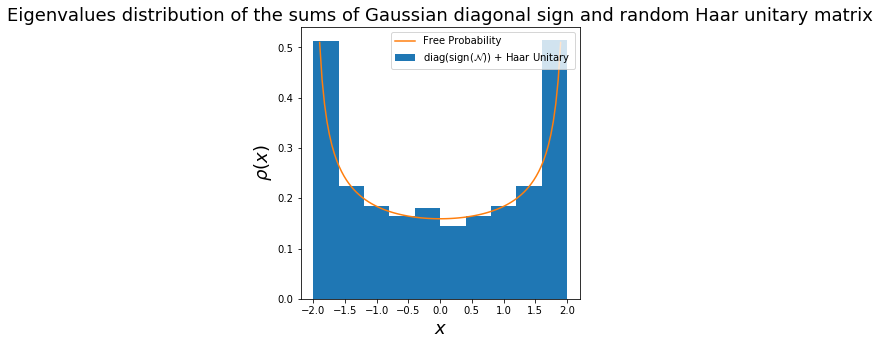

In [4]:
n = 1000
x = linspace(-1.9, 1.9, 100)
trials = 10
w = zeros((n, trials))
for j in range(trials):
    # coin flipping example
    A = sign(randn(n))
    B = sign(randn(n))
    Q = qr(randn(n, n))[0]
    # the asymptotic eigenvalue distribution of sums of random matrices which are asymptotically free
    ## free probability with Haar unitary measure
    w[:, j] = eigvalsh(diag(A) + dot(dot(Q.T, diag(B)), Q))

plt.figure(figsize=(5, 5))
plt.hist(w.reshape(n * trials, 1), normed=True, align=u'mid', label=r'diag(sign($\mathcal{N}$)) + Haar Unitary')
plt.plot(x, 1 / (pi * sqrt(4 - x ** 2)), label='Free Probability')
plt.title('Eigenvalues distribution of the sums of Gaussian diagonal sign and random Haar unitary matrix', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.legend(loc='upper right')
plt.show()

## 2 Elementary Free Probability - II

One of the first theorems in free probability theory, proved by **Voiculescu** in 1985, was the **free analogue of the central limit theorem**. Surprisingly, it turned out that the analogue of the **Gaussian distribution** in free probability theory is the **semicircular distribution**.

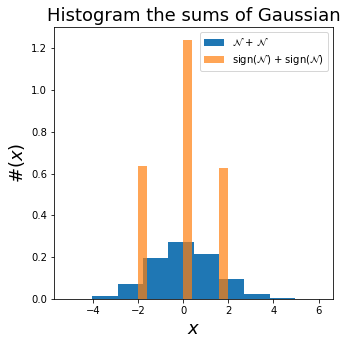

In [5]:
n = 1000
x = linspace(-1.9, 1.9, 100)
trials = 10
v1 = zeros((n, trials))
v2 = zeros((n, trials))
for j in range(trials):
    A = randn(n)
    B = randn(n)
    # classical probability
    v1[:, j] = A + B
    A = sign(randn(n))
    B = sign(randn(n))
    # classical probability
    v2[:, j] = A + B

plt.figure(figsize=(5, 5))
plt.hist(v1.reshape(n * trials, 1), normed=True, align=u'mid', label=r'$\mathcal{N}$ + $\mathcal{N}$')
plt.hist(v2.reshape(n * trials, 1), normed=True, align=u'mid', label=r'sign($\mathcal{N}$) + sign($\mathcal{N}$)', alpha=0.7)
plt.title('Histogram the sums of Gaussian', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\#(x)$', fontsize=18)
plt.legend(loc='upper right')
plt.show()

## 3 Elementary Free Probability - III

+ the sum of Gaussian random matrix and Wishart matrix

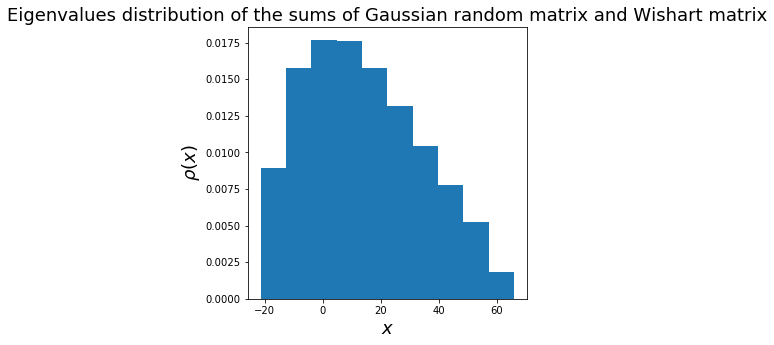

In [6]:
n = 200
trials = 100
w = zeros((n, trials))
for j in range(trials):
    A = randn(n, n)
    B = randn(n, n)
    B = dot(B, B.T) / sqrt(n)
    # the asymptotic eigenvalue distribution of sums of random matrices which are asymptotically free
    w[:, j] = eigvalsh(A + B)

plt.figure(figsize=(5, 5))
plt.hist(w.reshape(n * trials, 1), normed=True)
plt.title('Eigenvalues distribution of the sums of Gaussian random matrix and Wishart matrix', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()

+ the sums of rescaled diagonal matrix and scaled Wishart matrix

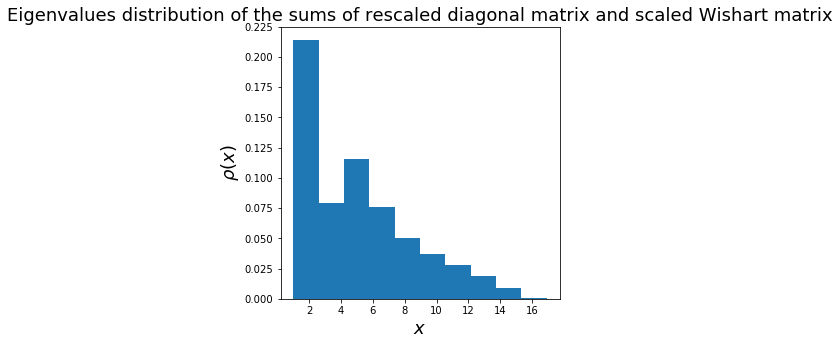

In [7]:
e = 2
#e = 1
#e = 0.5
trials = 4000
n = 100
L = 50
w = zeros((n, trials))
#A = diag([5.0 if i < L else 1.0 for i in range(n)])
for j in range(trials):
    A = diag([5.0 if rand() <= 0.5 else 1.0 for _ in range(n)])
    G = randn(n, L) / sqrt(L)
    W = dot(G, G.T)
    C = A + e * W
    w[:, j] = eigvalsh(C)
    
plt.figure(figsize=(5, 5))
plt.hist(w.reshape(n * trials, 1), normed=True)
plt.title('Eigenvalues distribution of the sums of rescaled diagonal matrix and scaled Wishart matrix', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()

+ the product of Wishart random matrix and Wishart matrix

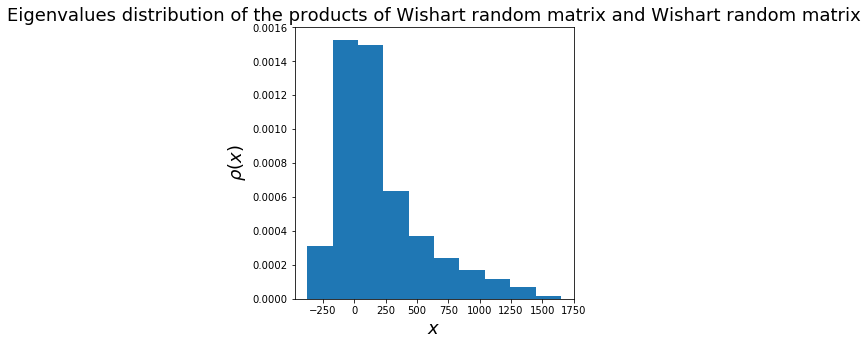

In [8]:
n = 200
trials = 100
w = zeros((n, trials))
for j in range(trials):
    A = randn(n, n)
    A = dot(A, A.T) / sqrt(n)
    B = randn(n, n)
    B = dot(B, B.T) / sqrt(n)
    # the asymptotic eigenvalue distribution of products of random matrices which are asymptotically free
    w[:, j] = eigvalsh(dot(A, B))

plt.figure(figsize=(5, 5))
plt.hist(w.reshape(n * trials, 1), normed=True)
plt.title('Eigenvalues distribution of the products of Wishart random matrix and Wishart random matrix', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()

## 4 Combinatorics of Free Probability Theory and Random Matrices

**(Roland Speicher, 2001)**

> **the arcsine law**:

Let $u$ be a **Haar unitary** in a $\ast$-probability space ($\mathcal{A}$, $\mathbb{\phi}$)

$$
d_{\mu_{u + u^{\ast}}}(t) =
\begin{cases}
\frac{1}{\pi\sqrt{4 - t^2}}dt, & -2 \le t \le 2 \\
0, & \text{otherwise}
\end{cases}
$$

+ **Free Addition Convolution 1**

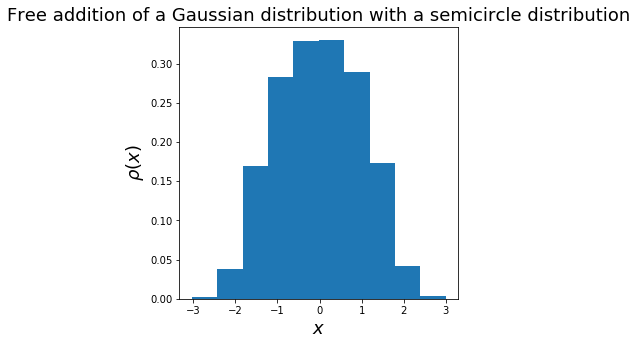

In [9]:
n = 150
trials = 100
w = zeros((n, trials))
for j in range(trials):
    # mean 0, variance 1/√2
    A = randn(n, n) / sqrt(2)
    S = (A + A.T) / sqrt(2 * n)
    Q = qr(A)[0]
    D = diag(randn(n) / sqrt(2))
    # free addition of a Gaussian distribution with a semicircle distribution
    w[:, j] = eigvalsh(dot(dot(Q, D), Q.T) + S)
    
plt.figure(figsize=(5, 5))
plt.hist(w.reshape(n * trials, 1), normed=True)
plt.title('Free addition of a Gaussian distribution with a semicircle distribution', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()

+ **Free Addition Convolution 2**

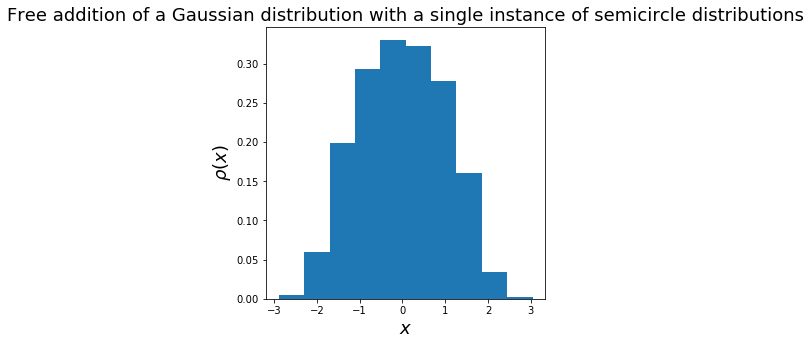

In [10]:
n = 150
trials = 100
w = zeros((n, trials))
# mean 0, variance 1/√2
A = randn(n, n) / sqrt(2)
S = (A + A.T) / sqrt(2 * n)
Q = qr(A)[0]
for j in range(trials):
    D = diag(randn(n) / sqrt(2))
    # free addition of a Gaussian distribution with a single instance of semicircle distributions
    w[:, j] = eigvalsh(dot(dot(Q, D), Q.T) + S)
    
plt.figure(figsize=(5, 5))
plt.hist(w.reshape(n * trials, 1), normed=True)
plt.title('Free addition of a Gaussian distribution with a single instance of semicircle distributions', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()

+ **Free Multiplicative Convolution**

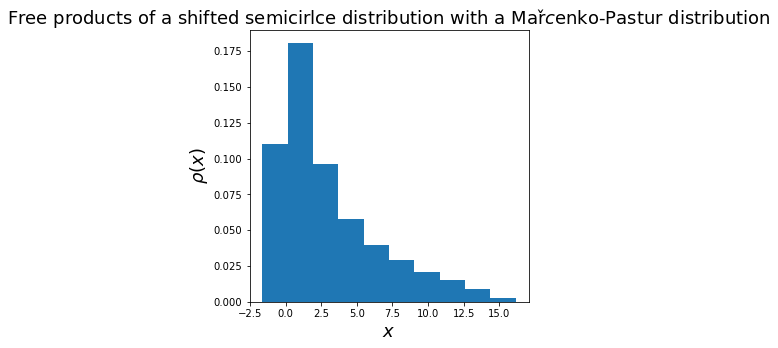

In [11]:
n = 200
trials = 100
w = zeros((n, trials))
for j in range(trials):
    # mean 0, variance 1/√2
    A = randn(n, n)
    B = A / sqrt(n)
    S = (A + A.T) / sqrt(2 * n)
    I = eye(n)
    # free products of a shifted semicirlce distribution with a Marcenko-Pastur distribution
    w[:, j] = eigvalsh(dot(dot(B, B.T), S + 3 * I))
    
plt.figure(figsize=(5, 5))
plt.hist(w.reshape(n * trials, 1), normed=True)
plt.title(r'Free products of a shifted semicirlce distribution with a Mar$\check{c}$enko-Pastur distribution', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()

+ **Free Compression Convolution 1**

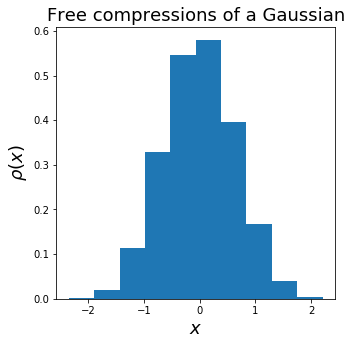

In [12]:
n = 300
trials = 100
#alpha = 0.2
#alpha = 0.4
#alpha = 0.6
alpha = 0.8
N = int(alpha * n)
w = zeros((N, trials))
for j in range(trials):
    # mean 0, variance 1/√2
    A = randn(n, n) / sqrt(2)
    Q = qr(A)[0]
    D = diag(randn(n) / sqrt(2))
    B = dot(dot(Q, D), Q.T)
    # free compressions of a Gaussian
    w[:, j] = eigvalsh(B[:N, :N])
    
plt.figure(figsize=(5, 5))
plt.hist(w.reshape(N * trials, 1), normed=True)
plt.title(r'Free compressions of a Gaussian', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()

+ **Free Compression Convolution 2**

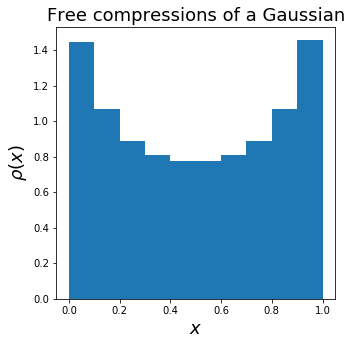

In [13]:
n = 200
trials = 4000
#alpha = 0.2
alpha = 0.4
#alpha = 0.6
#alpha = 0.8
N = int(alpha * n)
w = zeros((N, trials))
for j in range(trials):
    # mean 0, variance 1/√2
    A = randn(n, n) / sqrt(2)
    Q = qr(A)[0]
    D = diag([1.0 if rand() <= 0.5 else 0.0 for _ in range(n)])
    B = dot(dot(Q, D), Q.T)
    # free compressions of a Gaussian
    w[:, j] = eigvalsh(B[:N, :N])
    
plt.figure(figsize=(5, 5))
plt.hist(w.reshape(N * trials, 1), normed=True)
plt.title(r'Free compressions of a Gaussian', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()

## 5 A random matrix calculator

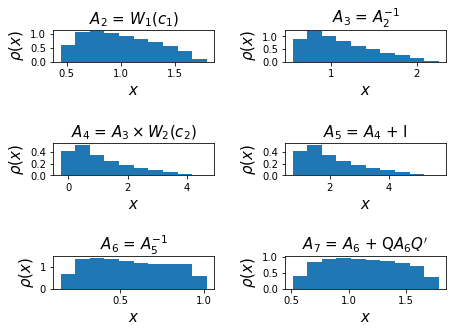

In [14]:
n = 100
trials = 1000
c1 = 0.1
c2 = 0.625
N1 = int(n / c1)
N2 = int(n / c2)
w2 = zeros((n, trials))
w3 = zeros((n, trials))
w4 = zeros((n, trials))
w5 = zeros((n, trials))
w6 = zeros((n, trials))
w7 = zeros((n, trials))

I = eye(n)
A1 = I
for j in range(trials):
    G1 = randn(n, N1) / sqrt(N1)
    W1 = dot(G1, G1.T)
    A2 = dot(A1, W1)
    w2[:, j] = eigvalsh(A2)
    
    A3 = inv(A2)
    w3[:, j] = eigvalsh(A3)
    
    G2 = randn(n, N2) / sqrt(N2)
    W2 = dot(G2, G2.T)
    A4 = dot(A3, W2)
    w4[:, j] = eigvalsh(A4)
    
    A5 = A4 + I
    w5[:, j] = eigvalsh(A5)

    A6 = inv(A5)
    w6[:, j] = eigvalsh(A6)
    
    Q = qr(randn(n, n) + randn(n, n) * 1j)[0]
    Q = dot(Q, diag(exp(2 * pi * 1j * rand(n))))
    Q = mat(Q)
    A7 = A6 + dot(dot(Q, A6), Q.H)
    w7[:, j] = eigvalsh(A7)
    
def example_plot(ax, w, title, fontsize=15):
    ax.hist(w.reshape(n * trials, 1), normed=True)
    ax.locator_params(nbins=3)
    ax.set_xlabel(r'$x$', fontsize=fontsize)
    ax.set_ylabel(r'$\rho(x)$', fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    
plt.close('all')
#plt.figure(figsize=(10, 10))
fig, ((ax2, ax3), (ax4, ax5), (ax6, ax7)) = plt.subplots(nrows=3, ncols=2)
plt.tight_layout(pad=0.4, w_pad=4.0, h_pad=6.0)
example_plot(ax2, w2, r'$A_2$ = $W_1(c_1)$')
example_plot(ax3, w3, r'$A_3$ = $A_2^{-1}$')
example_plot(ax4, w4, r'$A_4$ = $A_3 \times W_2(c_2)$')
example_plot(ax5, w5, r'$A_5$ = $A_4$ + I')
example_plot(ax6, w6, r'$A_6$ = $A_5^{-1}$')
example_plot(ax7, w7, r'$A_7$ = $A_6$ + Q$A_6Q^{\prime}$')
plt.show()

+ Jacobi matrix ensemble

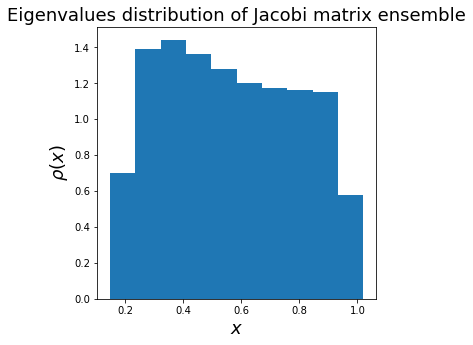

In [15]:
n = 100
trials = 1000
c1 = 0.1
c2 = 0.625
N1 = int(n / c1)
N2 = int(n / c2)
w = zeros((n, trials))

I = eye(n)
A1 = I
for j in range(trials):
    G1 = randn(n, N1) / sqrt(N1)
    W1 = dot(G1, G1.T)
    
    G2 = randn(n, N2) / sqrt(N2)
    W2 = dot(G2, G2.T)
    
    J = inv(I + dot(W2, inv(W1)))
    w[:, j] = eigvalsh(J)

plt.figure(figsize=(5, 5))
plt.hist(w.reshape(n * trials, 1), normed=True)
plt.title(r'Eigenvalues distribution of Jacobi matrix ensemble', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()

## 6 High-dimensional inference

In high-dimensional inference applications, n is often interpreted as the number of variables (spatial dimension) while N is the number of measurements (temporal dimension). The matrices $A_n$ and $B_N$ then model the spatial and temporal covariance structure of the collected data. The parameter $c_N = \frac{n}{N}$ is the ratio of the number of variables to the number of measurements. In a sample size constrained setting, we expect $c_N$ to be significantly greater than zero.

Assume that $A_n$ and $B_N$ have the same limiting eigenvalue distribution function given by

$$F^A(x) = F^B(x) = 0.5 \mathbb{1}_{[1, \infty)} + 0.5 \mathbb{1}_{[2, \infty)}$$

The **Stieltjes transform** of the limiting eigenvalue distribution function is

$$m_A(z) = m_B(z) = \frac{0.5}{2 - z} + \frac{0.5}{1 - z}$$

which satisfies the polynomial equation $L_{m z}^A(m, z) = L_{m z}^B(m, z) = 0$,

where

$$L_{m z}^A = L_{m z}^B = (- 6 z + 2 z^2 + 4) m + 2 z - 3$$

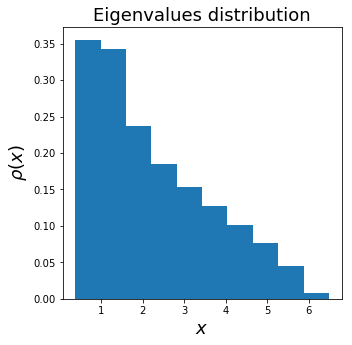

In [16]:
#c = 0.001
#c = 0.05
c = 0.25
N = 400
n = int(c * N)
trials = 1000
w = zeros((n, trials))
for j in range(trials):
    G = randn(n, N) / sqrt(N)
    A = diag([2.0 if rand() <= 0.5 else 1.0 for _ in range(n)])
    B = diag([2.0 if rand() <= 0.5 else 1.0 for _ in range(N)])
    X = dot(dot(sqrtm(A), G), sqrtm(B))
    S = dot(X, X.T)
    w[:, j] = eigvalsh(S)
    
plt.figure(figsize=(5, 5))
plt.hist(w.reshape(n * trials, 1), normed=True)
plt.title('Eigenvalues distribution', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$\rho(x)$', fontsize=18)
plt.show()

## 7 Spectrum sensing algorithm